# Uczenie maszynowe w analizie szeregów czasowych

## Setup

In [61]:
import numpy as np # algebra
import pandas as pd # data processing, zarządzanie plikami, ramki danych


import matplotlib as mpl
import matplotlib.pyplot as plt   # wizualizacja danych
#import seaborn as sns             # wizualizacja danych
import matplotlib.dates as mdates # wizualizacja danych - dat

# Wybór danych

Wybrane szeregi czasowe to dane pobierane miesięcznie od 2014.01.01 do 2024.01.01.


# Szereg stacjonarny
1-Month Real Interest Rate

https://fred.stlouisfed.org/series/REAINTRATREARAT1MO

In [30]:
data_rate = pd.read_csv("D:\inz\data\interest_rate.csv", sep=',', encoding='utf-8')
df_rate = pd.DataFrame(data_rate)
df_rate.columns.values[1] = 'REAL_INTEREST_RATE'
print(df_rate.head(10))


         DATE  REAL_INTEREST_RATE
0  2014-01-01           -1.547831
1  2014-02-01           -1.563561
2  2014-03-01           -0.425359
3  2014-04-01           -1.576272
4  2014-05-01           -1.945522
5  2014-06-01           -1.248905
6  2014-07-01           -2.327665
7  2014-08-01           -1.696280
8  2014-09-01           -2.775060
9  2014-10-01           -1.153638


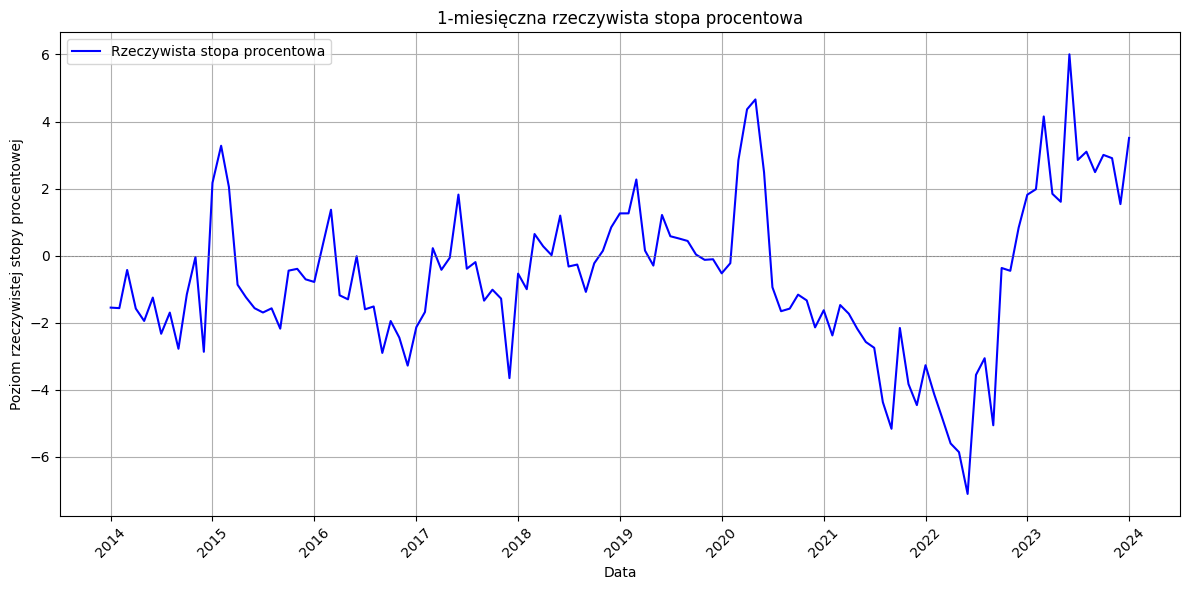

In [62]:
df_rate['DATE'] = pd.to_datetime(df_rate['DATE'])

plt.figure(figsize=(12, 6))  # Ustawienie rozmiaru wykresu
plt.plot(df_rate['DATE'], df_rate['REAL_INTEREST_RATE'], label='Rzeczywista stopa procentowa', color='blue')
plt.title('1-miesięczna rzeczywista stopa procentowa')
plt.xlabel('Data')
plt.ylabel('Poziom rzeczywistej stopy procentowej')

# Ustawienie wyświetlania daty
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tick co rok
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tylko roku

# Pochylenie napisów na osi X
plt.xticks(rotation=45)  # Pochylenie napisów o 45 stopni

plt.axhline(0, color='grey', lw=0.5, ls='--')  # Linia odniesienia na poziomie 0
plt.grid()
plt.legend()
plt.tight_layout()  # Dopasowanie układu do wykresu
plt.show()


# Szereg z trendem
Consumer Price Index for All Urban Consumers: All Items in U.S. City Average

https://fred.stlouisfed.org/series/CPIAUCSL

In [69]:
data_cpi = pd.read_csv("D:\inz\data/cpi.csv", sep=',', encoding='utf-8')
df_cpi = pd.DataFrame(data_cpi)
df_cpi.columns.values[1] = 'CPI'
print(df_cpi.head(10))

         DATE      CPI
0  2014-01-01  235.288
1  2014-02-01  235.547
2  2014-03-01  236.028
3  2014-04-01  236.468
4  2014-05-01  236.918
5  2014-06-01  237.231
6  2014-07-01  237.498
7  2014-08-01  237.460
8  2014-09-01  237.477
9  2014-10-01  237.430


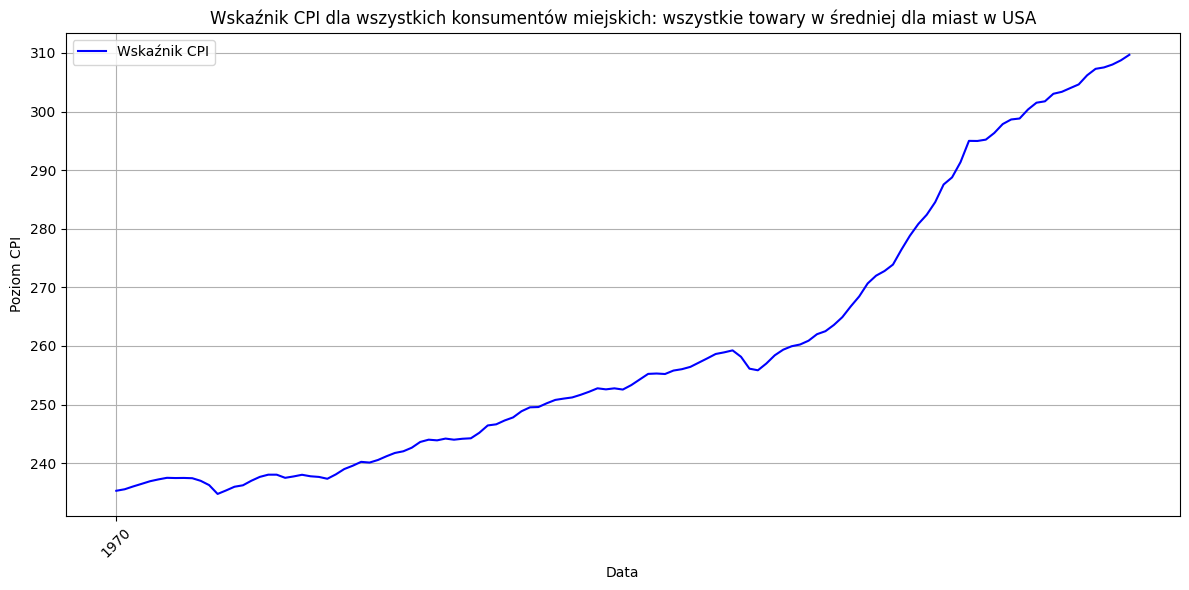

In [75]:
df_rate['DATE'] = pd.to_datetime(df_rate['DATE'])

plt.figure(figsize=(12, 6))  # Ustawienie rozmiaru wykresu
plt.plot(df_cpi['DATE'], df_cpi['CPI'], label='Wskaźnik CPI', color='blue')
plt.title('Wskaźnik CPI dla wszystkich konsumentów miejskich: wszystkie towary w średniej dla miast w USA')
plt.xlabel('Data')
plt.ylabel('Poziom CPI')

# Ustawienie wyświetlania daty
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tick co rok
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tylko roku

# Pochylenie napisów na osi X
plt.xticks(rotation=45)  # Pochylenie napisów o 45 stopni

plt.grid()
plt.legend()
plt.tight_layout()  # Dopasowanie układu do wykresu
plt.show()

# Szereg  z sezonowością
Retail Sales: Building Materials and Garden Equipment and Supplies Dealers

https://fred.stlouisfed.org/series/MRTSSM444USN

In [71]:
data_materials = pd.read_csv("D:\inz\data\materials.csv", sep=',', encoding='utf-8')
df_materials = pd.DataFrame(data_materials)
df_materials.columns.values[1] = 'MAT'
print(df_materials.head(10))

         DATE      MAT
0  2014-01-01  19688.0
1  2014-02-01  18801.0
2  2014-03-01  24103.0
3  2014-04-01  30137.0
4  2014-05-01  33416.0
5  2014-06-01  30072.0
6  2014-07-01  28642.0
7  2014-08-01  26446.0
8  2014-09-01  26195.0
9  2014-10-01  27329.0


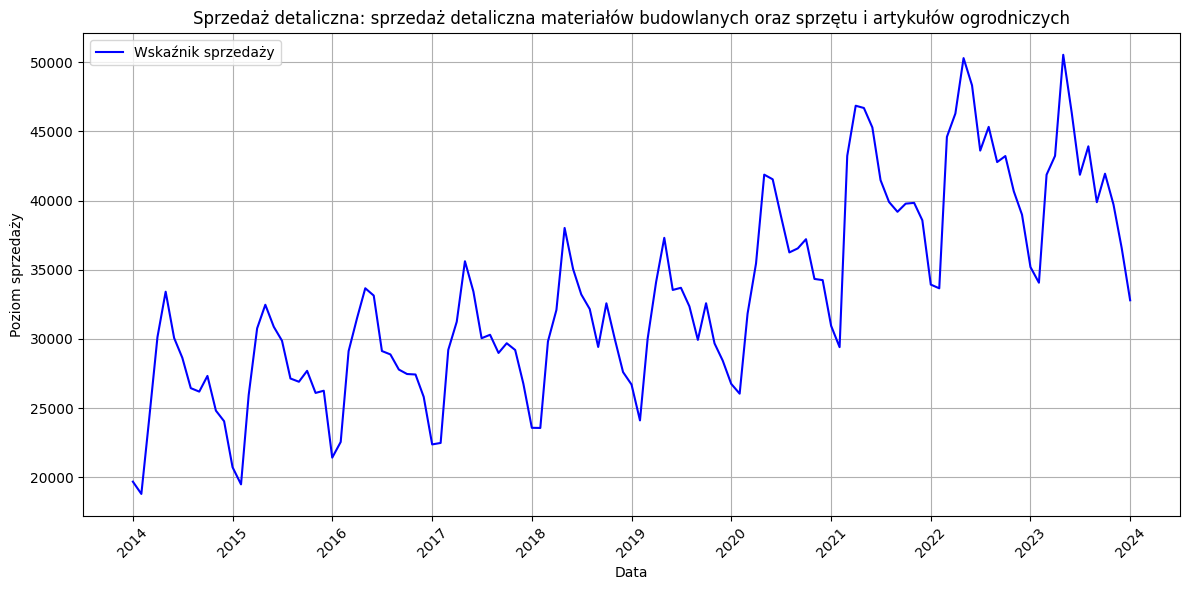

In [76]:
df_materials['DATE'] = pd.to_datetime(df_rate['DATE'])

plt.figure(figsize=(12, 6))  # Ustawienie rozmiaru wykresu
plt.plot(df_materials['DATE'], df_materials['MAT'], label='Wskaźnik sprzedaży', color='blue')
plt.title('Sprzedaż detaliczna: sprzedaż detaliczna materiałów budowlanych oraz sprzętu i artykułów ogrodniczych')
plt.xlabel('Data')
plt.ylabel('Poziom sprzedaży')

# Ustawienie wyświetlania daty
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tick co rok
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tylko roku

# Pochylenie napisów na osi X
plt.xticks(rotation=45)  # Pochylenie napisów o 45 stopni

plt.grid()
plt.legend()
plt.tight_layout()  # Dopasowanie układu do wykresu
plt.show()